In [1]:
pwd

'/home/yuya/Downloads/kaggle-customer-churn'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
df = df.drop(['RowNumber',"CustomerId","Surname"],axis=1)

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df_cat = df[['Geography','Gender']]

In [10]:
#One hot encoding to not imply ordinance - which would be the case wuth ordinary label encoding
df_cat = pd.get_dummies(df_cat, drop_first=True)

In [11]:
df_cat

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,0
9998,1,0,1


In [12]:
#Drop the categorical columns
df = df.drop(["Geography","Gender"],axis=1)

In [13]:
#Combine the numeric columns with the categorical columns that have been converted to numeric form by one hot encoing
df_int = pd.concat([df,df_cat],axis=1)

In [14]:
df_int

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


<AxesSubplot:>

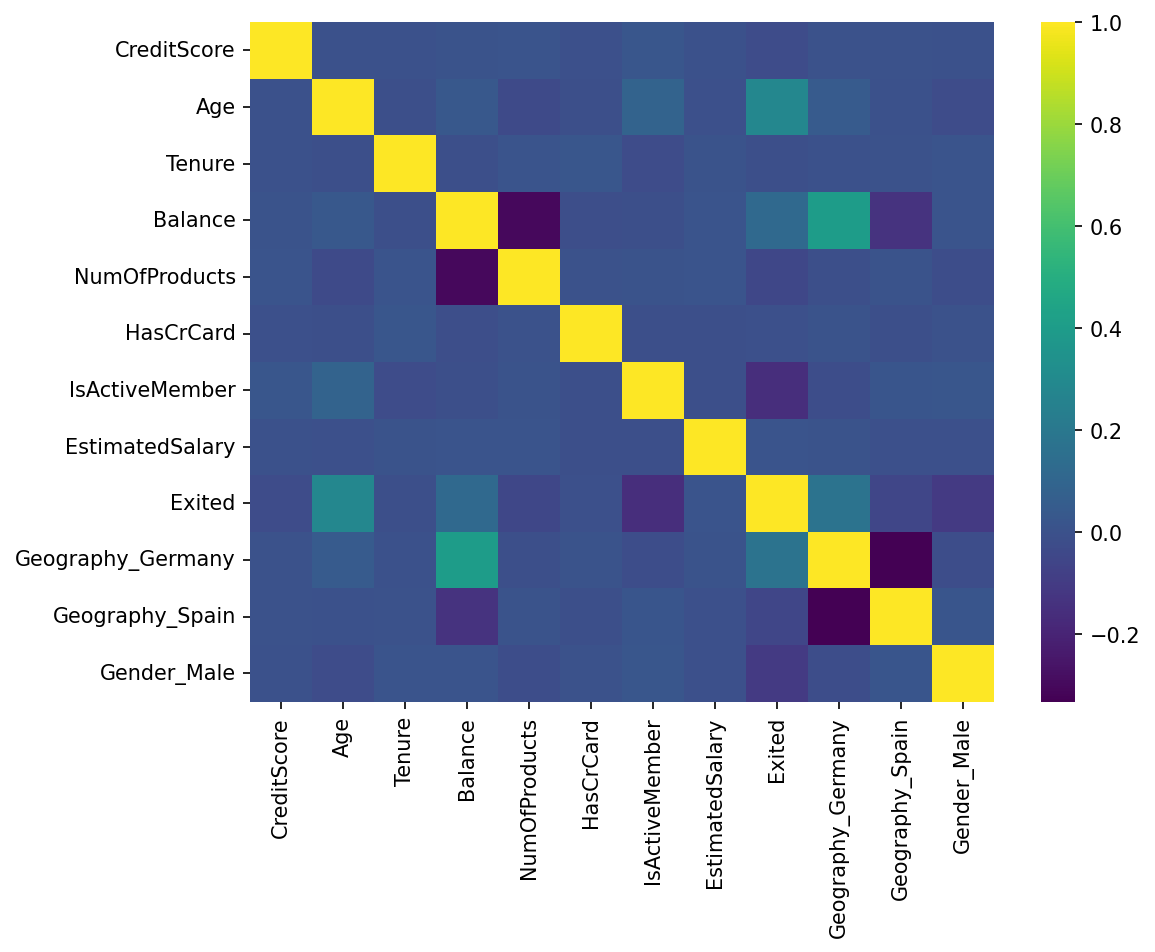

In [15]:
plt.figure(figsize=(8,6), dpi=150)
sns.heatmap(df_int.corr(), cmap='viridis')

<AxesSubplot:xlabel='Exited', ylabel='count'>

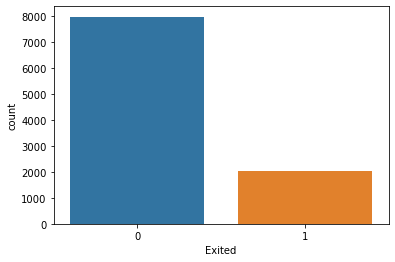

In [16]:
#Not too imbalanced
sns.countplot(data = df_int, x="Exited")

<AxesSubplot:xlabel='Gender_Male', ylabel='CreditScore'>

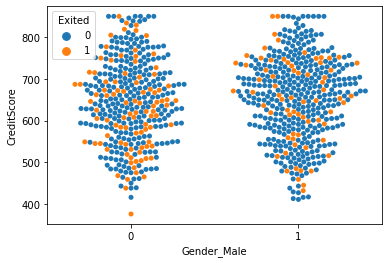

In [17]:
#ONLY 800 since if no. data is too big, it can't plot all instances.
#Swarmplot prevents overlapping of points

#plt.figure(figsize=(6,4),dpi=150)
sns.swarmplot(data=df_int[:800], y="CreditScore",hue="Exited", x='Gender_Male')

(0.0, 5.0)

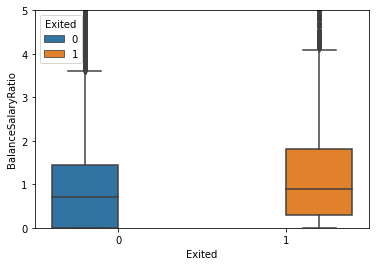

In [18]:
#People with higher balance-salary ratio churn more - this code has been taken from
#https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/notebook
df_int['BalanceSalaryRatio'] = df_int['Balance']/df_int['EstimatedSalary']
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_int)
plt.ylim(0, 5)

(-1.0, 1.0)

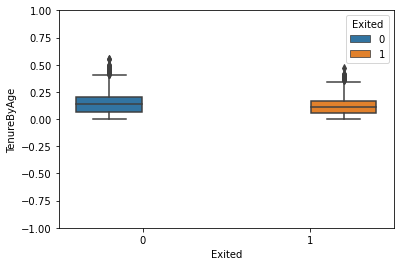

In [19]:
#https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/notebook
df_int['TenureByAge'] = df_int.Tenure/(df_int.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_int)
plt.ylim(-1, 1)

<AxesSubplot:xlabel='EstimatedSalary'>

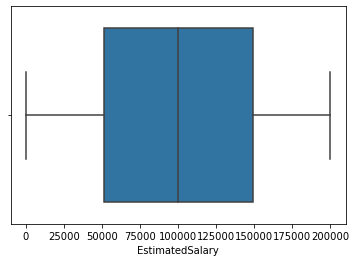

In [20]:
#I am not sure why the hue is not visible

sns.boxplot(data=df_int, x="EstimatedSalary",hue="Exited")

<AxesSubplot:xlabel='Balance'>

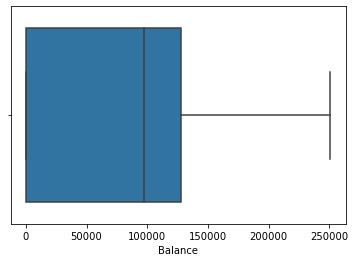

In [21]:
sns.boxplot(data=df_int, x="Balance",hue="Exited")

<AxesSubplot:xlabel='Balance', ylabel='CreditScore'>

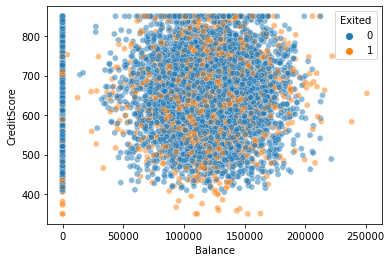

In [22]:
sns.scatterplot(data=df_int, x='Balance',y="CreditScore",hue="Exited", alpha=0.5)

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

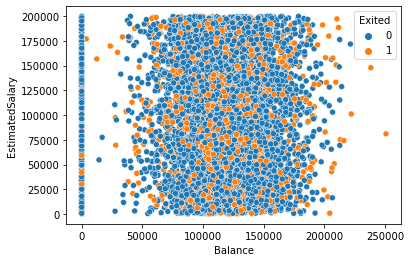

In [23]:
sns.scatterplot(data=df_int, x='Balance',y="EstimatedSalary",hue="Exited")

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

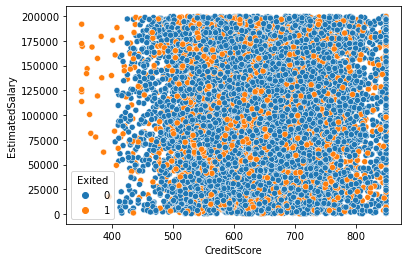

In [24]:
sns.scatterplot(data=df_int, x='CreditScore',y="EstimatedSalary",hue="Exited")

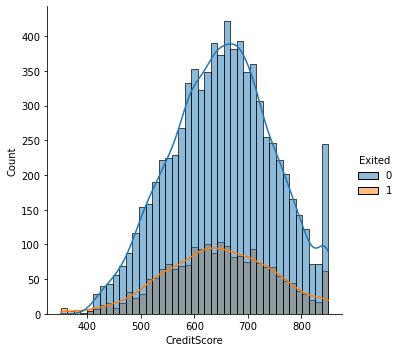

In [25]:
sns.displot(data=df_int, x="CreditScore",kde=True,hue='Exited')

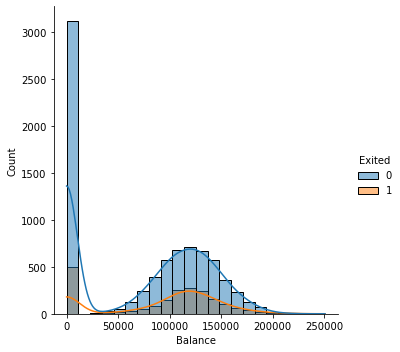

In [26]:
sns.displot(data =df_int, x = "Balance", hue="Exited", kde=True)

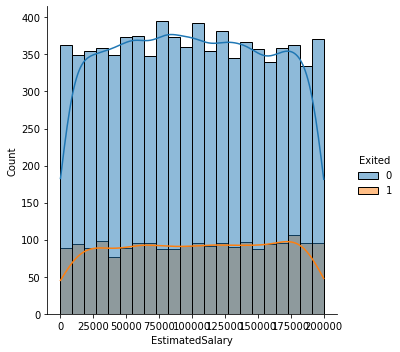

In [27]:
#Seemingly no correlation between churn likelihood and EstimatedSalary
sns.displot(data=df_int, x="EstimatedSalary",kde=True,hue='Exited')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df_int.drop('Exited', axis=1)

In [30]:
y = df_int['Exited']
#If we wanna convert y to a dataframe with a single col. We can do:
#y = pd.DataFrame(y, columns=['Exited'])

In [31]:
#Remove the temporarily added columns
X.drop(['TenureByAge','BalanceSalaryRatio'], axis = 1, inplace=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
#Carry out standardization a.k.a Z-score normalization - virtually no cons in scaling feature values
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

In [38]:
param1 = {
    'clf__alpha': [0.001, 0.01, 0.05, 0.1]
}
param2 = {
    'clf__n_neighbors':[2,3,4,5,6,8,10],
    'clf__leaf_size':[10,20,30,50],
    'clf__weights' : ['uniform','distance']
}
param3 = {
    'clf__C':[0.001,0.01,0.1,0.2,0.3,0.5,0.7,1],
    "clf__kernel":['linear', 'poly', 'rbf'],
    'clf__degree':[2,3,4,5]
}
param4 = {
    'clf__max_depth':[2,4,6,8,10,12],
    'clf__criterion':['gini','entropy']
}
param5 = {
    'clf__n_estimators':[10,30,50,100,250],
    'clf__criterion':['gini','entropy'],
    'clf__max_depth':[10,30,50,70,90,120],
    'clf__min_samples_split':[2, 6, 10],
    'clf__min_samples_leaf':[1, 3, 4] 
}
param6 = {
    'clf__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30]
}

In [39]:
pipe1 = Pipeline([('clf',MLPClassifier())])
pipe2 = Pipeline([('clf',KNeighborsClassifier())])
pipe3 = Pipeline([('clf',SVC())])
pipe4 = Pipeline([('clf',DecisionTreeClassifier())])
pipe5 = Pipeline([('clf',RandomForestClassifier())])
pipe6 = Pipeline([('clf',AdaBoostClassifier())])

In [40]:
# REF
#https://stackoverflow.com/questions/23045318/grid-search-over-multiple-classifiers
# This took around 50 minutes to 1 hour on my laptop
# I did verbose = 2 and got too many lines of text, so set to 0 is good in this case.
params = [param1, param2, param3, param4, param5, param6]
pipes = [pipe1, pipe2, pipe3, pipe4, pipe5, pipe6]
best_params = []

for i in range(len(params)):
        print(f"Start Gridsearch for{pipes[i].get_params}")
        gs = GridSearchCV(pipes[i], params[i], verbose=0, refit=False, n_jobs=-1)
        gs = gs.fit(X_train, y_train)
        print(f"End Gridsearch for{pipes[i].get_params}")
        best_params.append(gs.best_params_)

Start Gridsearch for<bound method Pipeline.get_params of Pipeline(steps=[('clf', MLPClassifier())])>


/home/yuya/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yuya/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yuya/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yuya/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yuya/anaconda3/lib/python3.9/site-packages

End Gridsearch for<bound method Pipeline.get_params of Pipeline(steps=[('clf', MLPClassifier())])>
Start Gridsearch for<bound method Pipeline.get_params of Pipeline(steps=[('clf', KNeighborsClassifier())])>
End Gridsearch for<bound method Pipeline.get_params of Pipeline(steps=[('clf', KNeighborsClassifier())])>
Start Gridsearch for<bound method Pipeline.get_params of Pipeline(steps=[('clf', SVC())])>
End Gridsearch for<bound method Pipeline.get_params of Pipeline(steps=[('clf', SVC())])>
Start Gridsearch for<bound method Pipeline.get_params of Pipeline(steps=[('clf', DecisionTreeClassifier())])>
End Gridsearch for<bound method Pipeline.get_params of Pipeline(steps=[('clf', DecisionTreeClassifier())])>
Start Gridsearch for<bound method Pipeline.get_params of Pipeline(steps=[('clf', RandomForestClassifier())])>
End Gridsearch for<bound method Pipeline.get_params of Pipeline(steps=[('clf', RandomForestClassifier())])>
Start Gridsearch for<bound method Pipeline.get_params of Pipeline(steps

In [41]:
best_params

[{'clf__alpha': 0.05},
 {'clf__leaf_size': 10, 'clf__n_neighbors': 10, 'clf__weights': 'distance'},
 {'clf__C': 1, 'clf__degree': 2, 'clf__kernel': 'rbf'},
 {'clf__criterion': 'entropy', 'clf__max_depth': 6},
 {'clf__criterion': 'gini',
  'clf__max_depth': 50,
  'clf__min_samples_leaf': 1,
  'clf__min_samples_split': 10,
  'clf__n_estimators': 250},
 {'clf__n_estimators': 6}]

In [50]:
#Initialize all the models with the OPTIMAL hyperparameters.
mlpc = MLPClassifier(alpha=0.1)
knnc = KNeighborsClassifier(n_neighbors=10, weights='distance', leaf_size=10)
svc = SVC(C=1, degree=2, kernel='rbf', probability=True)
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=6)
rfc = RandomForestClassifier(n_estimators=250, criterion='gini',max_depth=90,min_samples_leaf=3, min_samples_split=10)
abc = AdaBoostClassifier(n_estimators=6)

In [51]:
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [53]:
X_train.shape

(7000, 11)

/home/yuya/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.76      0.49      0.59       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2416
           1       0.69      0.35      0.46       584

    accuracy                           0.84      3000
   macro avg       0.78      0.66      0.69      3000
weighted avg       0.83      0.84      0.82      3000

SVC
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.80      0.38      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86  

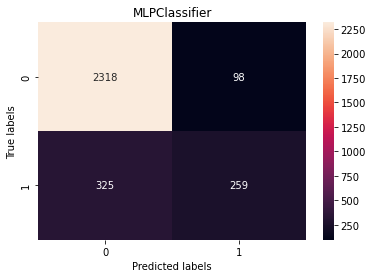

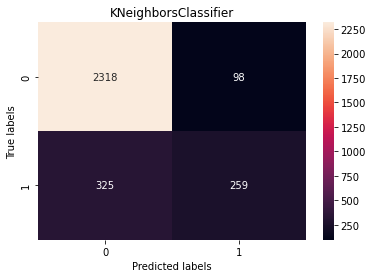

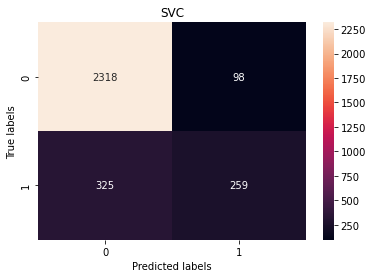

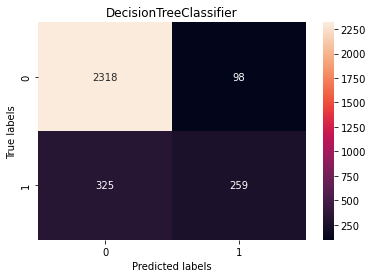

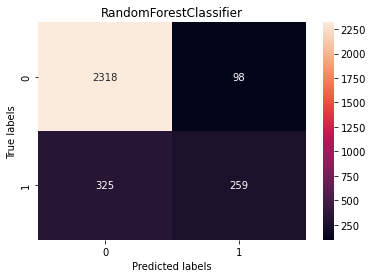

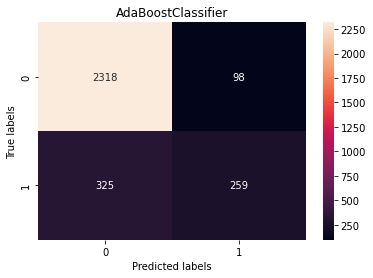

In [54]:
models = [mlpc,knnc,svc,dtc,rfc,abc]
# Modified the following:
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

#Fit each of the models to the data, compare the performance using confusion matrix and find the best model with best hyperparameters.
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    model_pred = models[i].predict(X_test)
    print(models[i].__class__.__name__)
    print(classification_report(y_test, model_pred))
for i in range(len(models)):
    #It took a while to figure out I needed a new plt.figure(i) every time, otherwise the plot gets overriden each time.
    plt.figure(i)
    labels = [0,1]
    cm = confusion_matrix(y_test, model_pred, labels=labels)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(models[i].__class__.__name__)
    ax.xaxis.set_ticklabels([0, 1])
    ax.yaxis.set_ticklabels([0, 1])

In [55]:
#MLP Seems to have the best set of scores, especially the recall value for churning (1)
import joblib

In [56]:
#Fit on the ENTIRE data now, so that it can be actually deployed - now that we already tested performance, make FULL use of ENTIRE data
mlpc.fit(X,y)

MLPClassifier(alpha=0.1)

In [57]:
joblib.dump(mlpc, "mlpc_model_chosen")

['mlpc_model_chosen']

In [ ]:
X

In [58]:
#X.head(1)
scaled_test_data = scaler.fit_transform(pd.DataFrame([[789,28,3,1000,1,1,1,320000,1,0,1]]))
# scaled_test_data = scaler.fit_transform(pd.DataFrame([[789,28,3,1000,1,1,1,320000,1,0,1],[1000,38,3,1000,1,1,1,120000,1,0,1]]))
mlpc.predict(scaled_test_data)

/home/yuya/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [59]:
#Since I only have one test point, when scaled using standardization(z score normalization) the data all becomes 0.
#https://stackoverflow.com/questions/57028971/sklearn-standardscaler-returns-all-zeros-for-all-input
pd.DataFrame(scaled_test_data[:1])

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test

/home/yuya/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


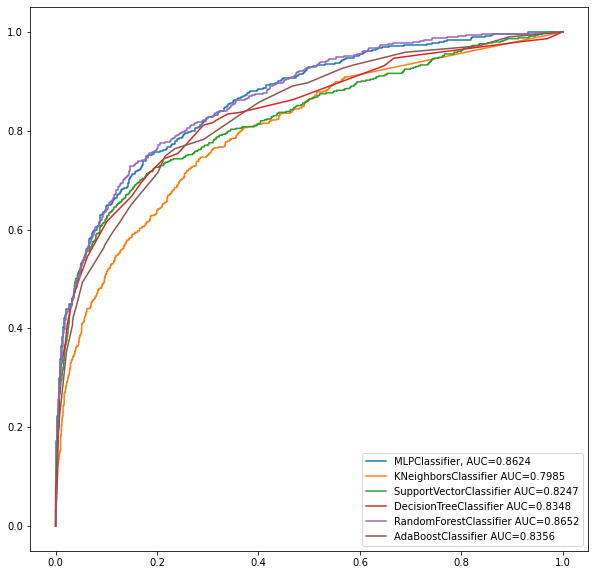

In [73]:
#Plot ROC Curve 

# FOR REF
#     mlpc = MLPClassifier(alpha=0.1)
#     knnc = KNeighborsClassifier(n_neighbors=10, weights='distance', leaf_size=10)
#     svc = SVC(C=1, degree=2, kernel='rbf')
#     dtc = DecisionTreeClassifier(criterion='entropy',max_depth=6)
#     rfc = RandomForestClassifier(n_estimators=250, criterion='gini',max_depth=90,min_samples_leaf=3, min_samples_split=10)
#     abc = AdaBoostClassifier(n_estimators=6)

# https://www.projectpro.io/recipes/plot-roc-curve-in-python
# https://www.statology.org/plot-multiple-roc-curves-python/

from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10,10))

#Since I fitted the mlpc to entire data incl. the test data, I shall create a new instance that doesn't 'know' about test data.
mlpc_fit_to_train_only = MLPClassifier(alpha=0.1)
mlpc_fit_to_train_only.fit(X_train,y_train)
y_pred = mlpc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="MLPClassifier, AUC="+str(auc))

y_pred = knnc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNeighborsClassifier AUC="+str(auc))

y_pred = svc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SupportVectorClassifier AUC="+str(auc))

y_pred = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="DecisionTreeClassifier AUC="+str(auc))

y_pred = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RandomForestClassifier AUC="+str(auc))

y_pred = abc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoostClassifier AUC="+str(auc))

#add legend
plt.legend()